<a href="https://colab.research.google.com/github/WelfLowe/Public-ML-Notebooks/blob/master/Variants_of_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.linear_model import LinearRegression


In [8]:
# Generate random dataset
np.random.seed(42)
X = np.linspace(0, 10, 20)
y = 2.5 * X + np.random.normal(0, 2, size=X.shape)  # y = 2.5x + noise


In [10]:
# Reshape for TensorFlow
X_train = X.reshape(-1, 1)
y_train = y.reshape(-1, 1)

# Define and train MSE-based Linear Regression model
model_mse = keras.Sequential([keras.layers.Dense(1, input_shape=(1,))])
model_mse.compile(optimizer="adam", loss="mse")
model_mse.fit(X_train, y_train, epochs=500, verbose=0)

# Define and train MAE-based Linear Regression model
model_mae = keras.Sequential([keras.layers.Dense(1, input_shape=(1,))])
model_mae.compile(optimizer="adam", loss="mae")
model_mae.fit(X_train, y_train, epochs=500, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Generate predictions
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred_mse = model_mse.predict(X_pred)
y_pred_mae = model_mae.predict(X_pred)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [14]:
# Fit a standard Linear Regression model (MSE-based)
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
y_pred_lr = lr.predict(X.reshape(-1, 1))


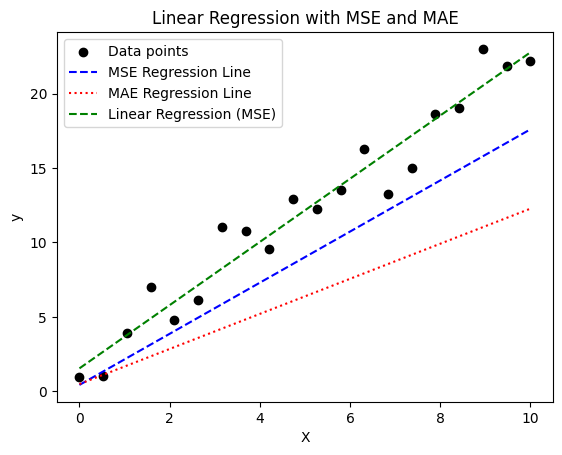

In [15]:
# Plot data and regression lines
plt.scatter(X, y, color='black', label="Data points")
plt.plot(X_pred, y_pred_mse, label="MSE DL Regression Line", color="blue", linestyle="dashed")
plt.plot(X_pred, y_pred_mae, label="MAE DL Regression Line", color="red", linestyle="dotted")
# Plot the standard Linear Regression line in green
plt.plot(X, y_pred_lr, color='green', linestyle='dashed', label="Linear Regression (MSE)")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with MSE and MAE")
plt.legend()
plt.show()